Regresiones para equipos HVAC_DX_Equipment de opensimula

Datos del equipo de la ASHARAE-140 CE300

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [126]:
valores_T_odb = [12.78,18.33,23.89,29.44,35,40.56,46.11]
valores_T_iwb = [7.22,10,12.78,15.56,18.33,21.11,23.89, 26.67,29.44,32.22,35]
valores_T_idb = [12.78,15.56,18.33,21.11,23.89, 26.67,29.44,32.22,35]
colores = ["darkblue","blue","darkcyan","cyan","darkorange","orange","darkred","red","black", "black", "black"]

In [127]:
data = pd.read_excel("DX_unit_CE300.xlsx", sheet_name="data")
data["T_odb^2"] = data["T_odb"]**2
data["T_iwb^2"] = data["T_iwb"]**2
data["T_idb^2"] = data["T_idb"]**2
data["T_odb*T_iwb"] = data["T_odb"]*data["T_iwb"]
data["T_odb*T_idb"] = data["T_odb"]*data["T_idb"]
data["T_iwb*T_idb"] = data["T_iwb"]*data["T_idb"]
X = data[["T_odb", "T_iwb", "T_idb", "T_odb^2","T_iwb^2","T_idb^2","T_odb*T_iwb","T_odb*T_idb","T_iwb*T_idb"]].to_numpy()

In [128]:
def draw_serie_3(serie_1,valor_1,serie_2,valor_2,color,eje_x,eje_y,df):
    puntos = df.loc[(df[serie_1] == valor_1) & (df[serie_2] == valor_2)]
    etiqueta = serie_1 + " = " + f'{valor_1:.2f}'+", " + serie_2 + " = " + f'{valor_2:.2f}'
    plt.scatter(puntos[eje_x],puntos[eje_y],c=color,label=etiqueta)
    plt.legend()

In [129]:
def draw_puntos_3(df,eje_x,eje_y,serie_1,valor_1,serie_2,valor_2,colores):
    if hasattr(valor_1, "__len__"):
        for i in range(len(valor_1)):
            draw_serie_3(serie_1,valor_1[i],serie_2,valor_2,colores[i],eje_x,eje_y,df)
    if hasattr(valor_2, "__len__") > 1:
        for i in range(len(valor_2)):
            draw_serie_3(serie_1,valor_1,serie_2,valor_2[i],colores[i],eje_x,eje_y,df)
    

In [130]:
def draw_regresion_3(x_1,x_2,x_3,nominal,model,color,cubica=False):
    if isinstance(x_1,np.ndarray):
        x_var = x_1
    if isinstance(x_2,np.ndarray):
        x_var = x_2
    if isinstance(x_3,np.ndarray):
        x_var = x_3
    if cubica:
        X = np.zeros([len(x_var),12])
    else:
        X = np.zeros([len(x_var),9])    
    X[:,0] = x_1
    X[:,1] = x_2
    X[:,2] = x_3
    X[:,3] = x_1*x_1
    X[:,4] = x_2*x_2
    X[:,5] = x_3*x_3
    X[:,6] = x_1*x_2
    X[:,7] = x_1*x_3
    X[:,8] = x_2*x_3
    if cubica:
        X[:,9] = x_1**3
        X[:,10] = x_2**3
        X[:,11] = x_3**3
    plt.plot(x_var,nominal*model.predict(X),c=color)    

In [131]:
def draw_curvas_3(modelo,nominal,T_odb,T_iwb, T_idb,colores,eje_x, serie, cubica=False):
    if (eje_x == "T_iwb"):
        if (serie == "T_odb"):
            for i in range(len(T_odb)):
                draw_regresion_3(T_odb[i], T_iwb, T_idb, nominal, modelo, colores[i],cubica)
        if (serie == "Tidb"):
            for i in range(len(T_idb)):
                draw_regresion_3(T_odb, T_iwb, T_idb[i], nominal, modelo, colores[i],cubica)
    elif (eje_x == "T_odb"):
        if (serie == "T_iwb"):
            for i in range(len(T_iwb)):
                draw_regresion_3(T_odb, T_iwb[i], T_idb, nominal, modelo, colores[i],cubica)
        if (serie == "T_idb"):
            for i in range(len(T_idb)):
                draw_regresion_3(T_odb, T_iwb, T_idb[i], nominal, modelo, colores[i],cubica)
    elif (eje_x == "T_idb"):
        if (serie == "T_odb"):
            for i in range(len(T_odb)):
                draw_regresion_3(T_odb[i], T_iwb, T_idb, nominal, modelo, colores[i],cubica)
        if (serie == "T_iwb"):
            for i in range(len(T_iwb)):
                draw_regresion_3(T_odb, T_iwb[i], T_idb, nominal, modelo, colores[i],cubica)

In [132]:
Q_tot = data["Q_tot"].to_numpy().reshape(-1,1)
model_tot = LinearRegression()
Q_tot_n = Q_tot / 33277
model_tot.fit(X, Q_tot_n)
Q_tot_coef = model_tot.coef_[0]
Q_tot_coef = np.append(Q_tot_coef,model_tot.intercept_[0])
Q_tot_coef = np.append(Q_tot_coef,model_tot.score(X,Q_tot_n))
Q_tot_coef

array([-3.76238353e-03,  1.94136840e-02,  4.78278148e-03, -2.53547095e-05,
        1.23175974e-03,  4.44808600e-04, -2.75387649e-04,  5.97656207e-05,
       -1.29740028e-03,  6.85091947e-01,  9.98094458e-01])

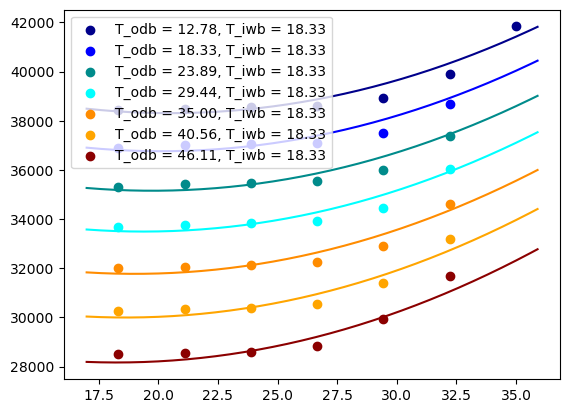

In [133]:
draw_puntos_3(data,'T_idb',"Q_tot","T_odb",valores_T_odb,'T_iwb',18.33,colores)
draw_curvas_3(model_tot,33277,valores_T_odb, 18.33,np.arange(17, 36, 0.1),colores,"T_idb", "T_odb")

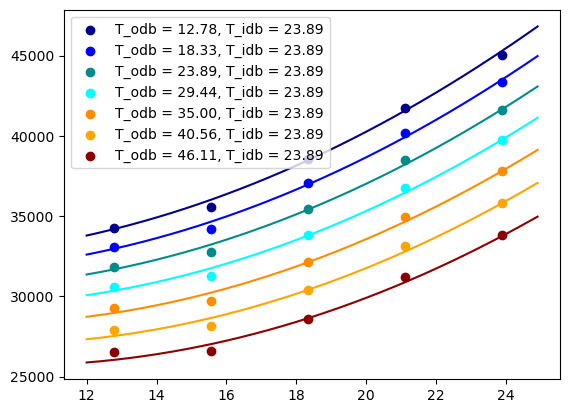

In [134]:
draw_puntos_3(data,'T_iwb',"Q_tot","T_odb",valores_T_odb,'T_idb',23.89,colores)
draw_curvas_3(model_tot,33277,valores_T_odb, np.arange(12, 25, 0.1),23.89,colores,"T_iwb", "T_odb")

In [135]:
P_tot = data["P_tot"].to_numpy().reshape(-1,1)
model_p = LinearRegression()
P_tot_n = P_tot / 10937
model_p.fit(X, P_tot_n)
P_tot_coef = model_p.coef_[0]
P_tot_coef = np.append(P_tot_coef,model_p.intercept_[0])
P_tot_coef = np.append(P_tot_coef,model_p.score(X,P_tot_n))
P_tot_coef

array([ 7.99028408e-03,  6.77948885e-05,  5.33880631e-04, -2.12529457e-05,
        4.94797974e-04,  1.98276431e-04,  1.93122395e-04,  7.73251079e-05,
       -5.69776998e-04,  4.97819259e-01,  9.98509800e-01])

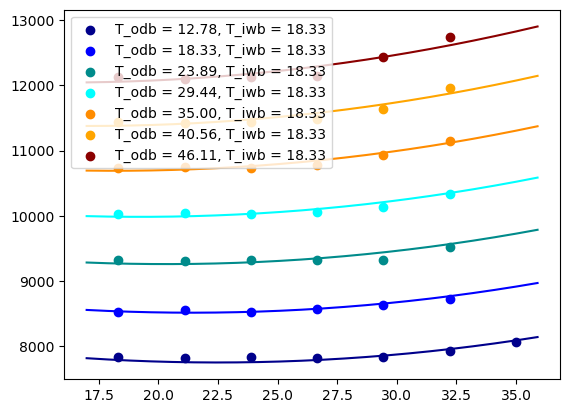

In [136]:
draw_puntos_3(data,'T_idb',"P_tot","T_odb",valores_T_odb,'T_iwb',18.33,colores)
draw_curvas_3(model_p,10937,valores_T_odb, 18.33,np.arange(17, 36, 0.1),colores,"T_idb", "T_odb")

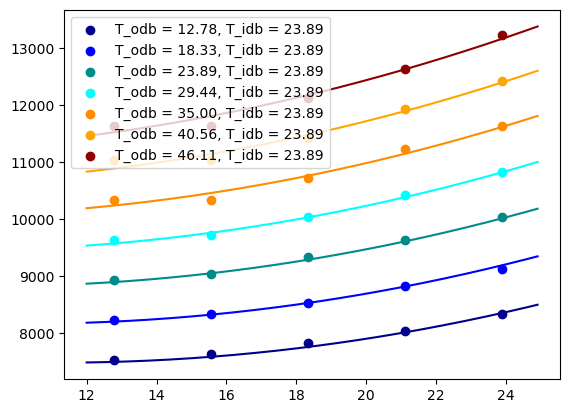

In [137]:
draw_puntos_3(data,'T_iwb',"P_tot","T_odb",valores_T_odb,'T_idb',23.89,colores)
draw_curvas_3(model_p,10937,valores_T_odb, np.arange(12, 25, 0.1),23.89,colores,"T_iwb", "T_odb")

In [138]:
Q_sen = data["Q_sen"].to_numpy().reshape(-1,1)
model_sen = LinearRegression()
Q_sen_n = Q_sen / 26043
model_sen.fit(X, Q_sen_n)
Q_sen_coef = model_sen.coef_[0]
Q_sen_coef = np.append(Q_sen_coef,model_sen.intercept_[0])
Q_sen_coef = np.append(Q_sen_coef,model_sen.score(X,Q_sen_n))
Q_sen_coef

array([-5.88085107e-03, -5.93576211e-02,  1.21652220e-01, -2.18419874e-05,
       -2.55830179e-03, -2.24682822e-03,  3.56101818e-04, -2.03228168e-04,
        3.15794944e-03,  4.05154701e-02,  9.40244113e-01])

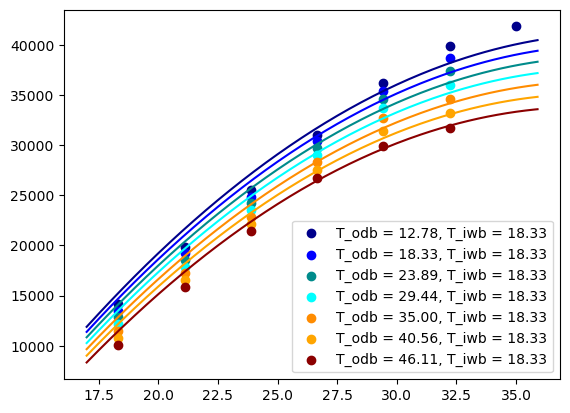

In [139]:
draw_puntos_3(data,'T_idb',"Q_sen","T_odb",valores_T_odb,'T_iwb',18.33,colores)
draw_curvas_3(model_sen,26043,valores_T_odb, 18.33,np.arange(17, 36, 0.1),colores,"T_idb", "T_odb")

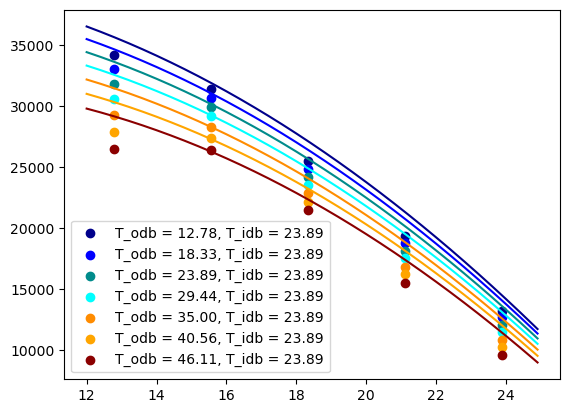

In [140]:
draw_puntos_3(data,'T_iwb',"Q_sen","T_odb",valores_T_odb,'T_idb',23.89,colores)
draw_curvas_3(model_sen,26043,valores_T_odb, np.arange(12, 25, 0.1),23.89,colores,"T_iwb", "T_odb")

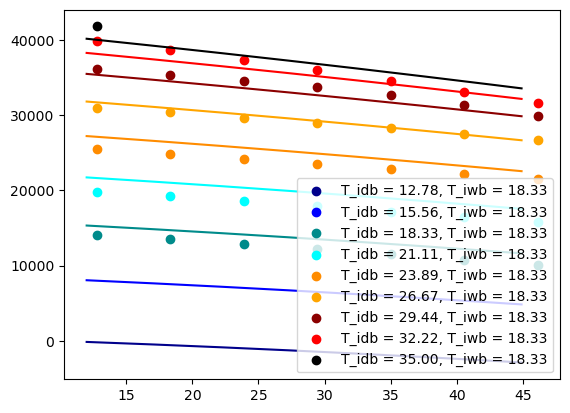

In [141]:
draw_puntos_3(data,'T_odb',"Q_sen","T_idb",valores_T_idb,'T_iwb',18.33,colores)
draw_curvas_3(model_sen,26043,np.arange(12, 45, 0.1),18.33,valores_T_idb,colores,"T_odb", "T_idb")

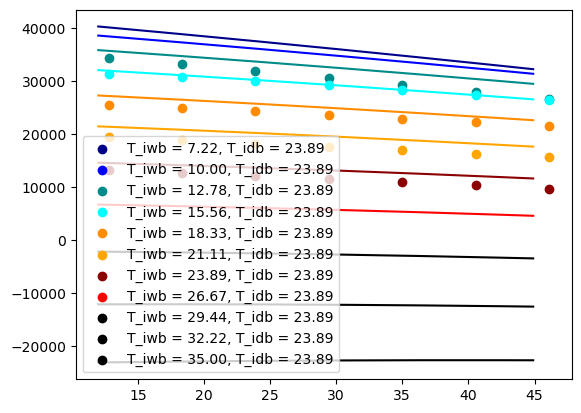

In [142]:
draw_puntos_3(data,'T_odb',"Q_sen","T_iwb",valores_T_iwb,'T_idb',23.89,colores)
draw_curvas_3(model_sen,26043,np.arange(12, 45, 0.1),valores_T_iwb,23.89,colores,"T_odb", "T_iwb")

In [143]:
# Cubica
data = pd.read_excel("DX_unit_CE300.xlsx", sheet_name="data")
data["T_odb^2"] = data["T_odb"]**2
data["T_iwb^2"] = data["T_iwb"]**2
data["T_idb^2"] = data["T_idb"]**2
data["T_odb*T_iwb"] = data["T_odb"]*data["T_iwb"]
data["T_odb*T_idb"] = data["T_odb"]*data["T_idb"]
data["T_iwb*T_idb"] = data["T_iwb"]*data["T_idb"]
data["T_odb^3"] = data["T_odb"]**3
data["T_iwb^3"] = data["T_iwb"]**3
data["T_idb^3"] = data["T_idb"]**3

X_2 = data[["T_odb", "T_iwb", "T_idb", "T_odb^2","T_iwb^2","T_idb^2","T_odb*T_iwb","T_odb*T_idb","T_iwb*T_idb","T_odb^3","T_iwb^3","T_idb^3"]].to_numpy()

In [144]:
Q_sen = data["Q_sen"].to_numpy().reshape(-1,1)
model_sen_2 = LinearRegression()
Q_sen_n = Q_sen / 26043
model_sen_2.fit(X_2, Q_sen_n)
Q_sen_coef_2 = model_sen_2.coef_[0]
Q_sen_coef_2 = np.append(Q_sen_coef_2,model_sen_2.intercept_[0])
Q_sen_coef_2 = np.append(Q_sen_coef_2,model_sen_2.score(X_2,Q_sen_n))
Q_sen_coef_2

array([-4.49077819e-03, -3.13532523e-02, -1.01139669e-01, -6.46688708e-05,
       -4.99126186e-03,  6.13178713e-03,  3.25526274e-04, -1.87308763e-04,
        4.16343607e-03,  4.98427587e-07,  3.30779981e-05, -1.07517721e-04,
        1.65519673e+00,  9.86357120e-01])

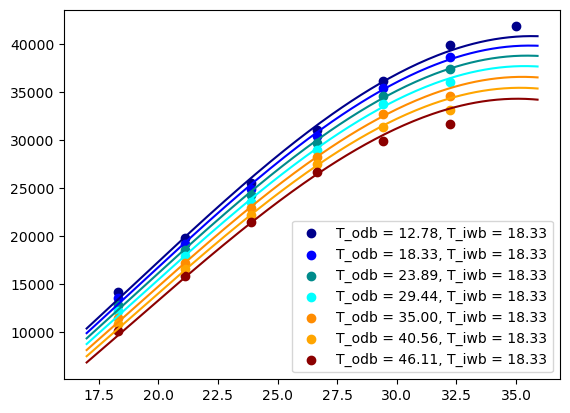

In [145]:
draw_puntos_3(data,'T_idb',"Q_sen","T_odb",valores_T_odb,'T_iwb',18.33,colores)
draw_curvas_3(model_sen_2,26043,valores_T_odb, 18.33,np.arange(17, 36, 0.1),colores,"T_idb", "T_odb", True)

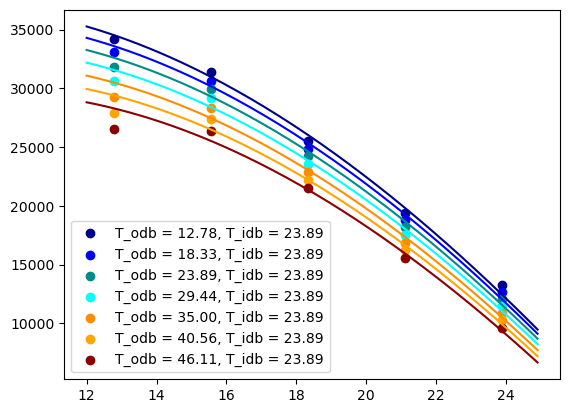

In [146]:
draw_puntos_3(data,'T_iwb',"Q_sen","T_odb",valores_T_odb,'T_idb',23.89,colores)
draw_curvas_3(model_sen_2,26043,valores_T_odb, np.arange(12, 25, 0.1),23.89,colores,"T_iwb", "T_odb", True)

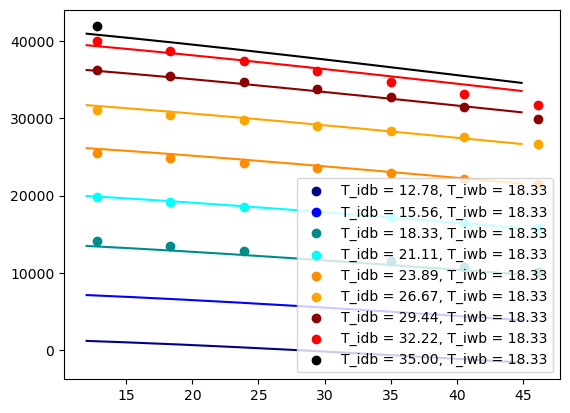

In [147]:
draw_puntos_3(data,'T_odb',"Q_sen","T_idb",valores_T_idb,'T_iwb',18.33,colores)
draw_curvas_3(model_sen_2,26043,np.arange(12, 45, 0.1),18.33,valores_T_idb,colores,"T_odb", "T_idb",True)

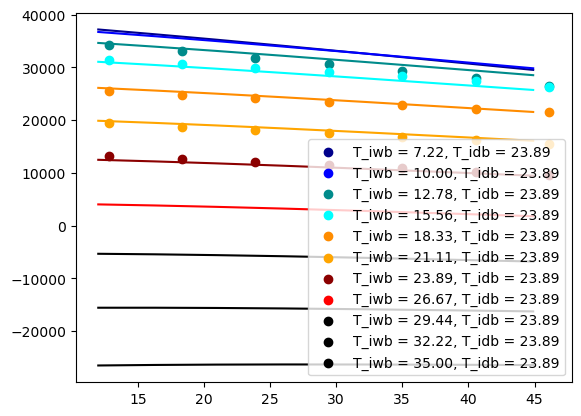

In [148]:
draw_puntos_3(data,'T_odb',"Q_sen","T_iwb",valores_T_iwb,'T_idb',23.89,colores)
draw_curvas_3(model_sen_2,26043,np.arange(12, 45, 0.1),valores_T_iwb,23.89,colores,"T_odb", "T_iwb", True)